# **THEORETICAL**

1. **What is a Convolutional Neural Network (CNN), and why is it used for image processing?**

A CNN is a type of deep learning model specifically designed to process structured grid data, such as images. It uses convolutional layers to automatically extract spatial and hierarchical features from input data, making it highly effective for image recognition, classification, and object detection.





2. **What are the key components of a CNN architecture?**

- Convolutional Layers: Extract features using filters.
- Activation Functions: Introduce non-linearity (e.g., ReLU).
- Pooling Layers: Reduce spatial dimensions and retain important information.
- Fully Connected Layers: Perform classification based on extracted features.
- Dropout Layers: Prevent overfitting by randomly deactivating neurons.

3. **What is the role of the convolutional layer in CNNs?**

The convolutional layer applies filters to input data to extract local features like edges, textures, or patterns by performing convolution operations. It preserves spatial relationships within the input.

4. **What is a filter (kernel) in CNNs?**

A filter (or kernel) is a small matrix of learnable parameters used in convolution operations. It slides over the input data to detect specific features (e.g., edges or textures).

5. **What is pooling in CNNs, and why is it important?**

Pooling is a downsampling technique that reduces the spatial dimensions of feature maps. It helps decrease computational complexity, provides translation invariance, and prevents overfitting by summarizing the feature map.


6. **What are the common types of pooling used in CNNs?**

- Max Pooling: Selects the maximum value from a region.
- Average Pooling: Computes the average of values in a region.
- Global Pooling: Reduces the entire feature map to a single value.

7. **How does the backpropagation algorithm work in CNNs?**

Backpropagation computes gradients of the loss function with respect to each parameter using the chain rule. It propagates errors backward through the network, updating weights to minimize the loss.

8. **What is the role of activation functions in CNNs?**

Activation functions introduce non-linearity, enabling CNNs to model complex patterns. Common activation functions include ReLU, sigmoid, and tanh.

9. **What is the concept of receptive fields in CNNs?**

The receptive field is the region of the input image that influences a particular neuron in the feature map. Larger receptive fields capture more context, while smaller ones focus on finer details.





10. **10. Explain the concept of tensor space in CNNs.**

n CNNs, data flows as multi-dimensional tensors, representing images and features. For example:

Input tensors (e.g., RGB images): 
H×W×C

Feature maps: 
H 
′
 ×W 
′
 ×D These tensors allow CNNs to process data efficiently.

11. **What is LeNet-5, and how does it contribute to the development of CNNs?**

LeNet-5 is one of the earliest CNN architectures, designed for handwritten digit recognition. Proposed by Yann LeCun, it demonstrated the power of convolution and pooling layers, inspiring modern CNN designs.


12. **What is AlexNet, and why was it a breakthrough in deep learning?**

AlexNet (2012) significantly advanced deep learning by using ReLU activation, dropout, and GPU training. It won the ImageNet challenge, reducing classification error by a large margin, and popularized CNNs.





13. **What is VGGNet, and how does it differ from AlexNet?**

VGGNet introduced a deeper architecture with smaller 3×3 filters, emphasizing simplicity and scalability. It outperformed AlexNet while being computationally expensive.



14. **What is GoogLeNet, and what is its main innovation?**

GoogLeNet (2014) introduced the Inception module, which uses multi-scale convolutions to capture features efficiently while reducing computational costs.



15. **What is ResNet, and what problem does it solve?**

ResNet introduced residual connections, allowing gradients to flow through shortcut paths. This solved the vanishing gradient problem, enabling the training of very deep networks (e.g., 50+ layers).

16. **What is DenseNet, and how does it differ from ResNet?**

DenseNet connects each layer to all subsequent layers, promoting feature reuse and reducing parameter count. Unlike ResNet, which uses additive identity mappings, DenseNet concatenates feature maps.



17. **What are the main steps involved in training a CNN from scratch?**

- Data Preparation: Collect and preprocess data.
- Model Design: Define the CNN architecture.
- Initialization: Initialize weights.
- Forward Pass: Compute outputs layer by layer.
- Loss Calculation: Compute error using a loss function.
- Backward Pass: Perform backpropagation to calculate gradients.
- Weight Updates: Optimize weights using algorithms like SGD or Adam.
- Evaluation: Test the model on unseen data.

# **PRACTICAL**

In [ ]:
# 1. Implement a basic convolution operation using a filter and a 5x5 image (matrix)

import numpy as np

# Define a 5x5 image (input matrix)
image = np.array([
    [1, 2, 3, 4, 5],
    [5, 6, 7, 8, 9],
    [9, 10, 11, 12, 13],
    [13, 14, 15, 16, 17],
    [17, 18, 19, 20, 21]
])

# Define a 3x3 filter (kernel)
filter_kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

# Function to perform convolution operation
def convolve(image, kernel):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # Output dimensions
    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1
    
    # Initialize output matrix
    output = np.zeros((output_height, output_width))
    
    # Perform convolution
    for i in range(output_height):
        for j in range(output_width):
            # Extract the region of interest
            region = image[i:i + kernel_height, j:j + kernel_width]
            
            # Perform element-wise multiplication and sum the result
            output[i, j] = np.sum(region * kernel)
    
    return output

# Perform the convolution
output = convolve(image, filter_kernel)

# Print the output
print("Input Image:\n", image)
print("\nFilter Kernel:\n", filter_kernel)
print("\nOutput Feature Map:\n", output)


Input Image:
 [[ 1  2  3  4  5]
 [ 5  6  7  8  9]
 [ 9 10 11 12 13]
 [13 14 15 16 17]
 [17 18 19 20 21]]

Filter Kernel:
 [[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]

Output Feature Map:
 [[-6. -6. -6.]
 [-6. -6. -6.]
 [-6. -6. -6.]]


In [ ]:
# 2. Implement max pooling on a 4x4 feature map with a 2x2 window
import numpy as np

# Define a 6x6 image (input matrix)
image = np.array([
    [18, 25, 34, 94, 5, 86],
    [5, 86, 79, 8, 9, 10],
    [9, 104, 11, 182, 143, 14],
    [13, 14, 815, 416, 17, 18],
    [817, 18, 19, 204, 21, 22],
    [214, 22, 23, 24, 25, 826]
])

# Define a 3x3 filter (kernel)
filter_kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

# Function to perform convolution operation
def convolve(image, kernel):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # Output dimensions
    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1
    
    # Initialize output matrix
    output = np.zeros((output_height, output_width))
    
    # Perform convolution
    for i in range(output_height):
        for j in range(output_width):
            # Extract the region of interest
            region = image[i:i + kernel_height, j:j + kernel_width]
            
            # Perform element-wise multiplication and sum the result
            output[i, j] = np.sum(region * kernel)
    
    return output

# Max Pooling function
def max_pool(output, pool_height, pool_width, stride=2):
    output_height, output_width = output.shape
    
    # Calculate the dimensions of the pooled output
    pooled_height = (output_height - pool_height) // stride + 1
    pooled_width = (output_width - pool_width) // stride + 1
    
    # Initialize pooled output
    pooled_output = np.zeros((pooled_height, pooled_width))
    
    for i in range(0, output_height - pool_height + 1, stride):
        for j in range(0, output_width - pool_width + 1, stride):
            # Extract the region of interest
            region = output[i:i + pool_height, j:j + pool_width]
            
            # Take the maximum value
            pooled_output[i // stride, j // stride] = np.max(region)
    
    return pooled_output

# Perform the convolution
output = convolve(image, filter_kernel)

# Perform max pooling with a 2x2 window and stride 2
pooled_output = max_pool(output, 2, 2)

# Print the results
print("Input Image:\n", image)
print("\nFilter Kernel:\n", filter_kernel)
print("\nOutput Feature Map (After Convolution):\n", output)
print("\nPooled Feature Map (After Max Pooling):\n", pooled_output)


Input Image:
 [[ 18  25  34  94   5  86]
 [  5  86  79   8   9  10]
 [  9 104  11 182 143  14]
 [ 13  14 815 416  17  18]
 [817  18  19 204  21  22]
 [214  22  23  24  25 826]]

Filter Kernel:
 [[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]

Output Feature Map (After Convolution):
 [[ -92.  -69.  -33.  174.]
 [-878. -402.  736.  564.]
 [  -6. -666.  664.  748.]
 [ 187. -590.  794. -222.]]

Pooled Feature Map (After Max Pooling):
 [[-69. 736.]
 [187. 794.]]


In [ ]:
#3. Implement the ReLU activation function on a feature map
import numpy as np

# Define a 6x6 image (input matrix)
image = np.array([
    [18, 25, 34, 94, 5, 86],
    [5, 86, 79, 8, 9, 10],
    [9, 104, 11, 182, 143, 14],
    [13, 14, 815, 416, 17, 18],
    [817, 18, 19, 204, 21, 22],
    [214, 22, 23, 24, 25, 826]
])

# Define a 3x3 filter (kernel)
filter_kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

# Function to perform convolution operation
def convolve(image, kernel):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # Output dimensions
    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1
    
    # Initialize output matrix
    output = np.zeros((output_height, output_width))
    
    # Perform convolution
    for i in range(output_height):
        for j in range(output_width):
            # Extract the region of interest
            region = image[i:i + kernel_height, j:j + kernel_width]
            
            # Perform element-wise multiplication and sum the result

            #relu activation
            output[i, j] = np.sum(region * kernel) if np.sum(region * kernel) > 0 else 0
    
    return output

# Max Pooling function
def max_pool(output, pool_height, pool_width, stride=2):
    output_height, output_width = output.shape
    
    # Calculate the dimensions of the pooled output
    pooled_height = (output_height - pool_height) // stride + 1
    pooled_width = (output_width - pool_width) // stride + 1
    
    # Initialize pooled output
    pooled_output = np.zeros((pooled_height, pooled_width))
    
    for i in range(0, output_height - pool_height + 1, stride):
        for j in range(0, output_width - pool_width + 1, stride):
            # Extract the region of interest
            region = output[i:i + pool_height, j:j + pool_width]
            
            # Take the maximum value
            pooled_output[i // stride, j // stride] = np.max(region)
    
    return pooled_output

# Perform the convolution
output = convolve(image, filter_kernel)

# Perform max pooling with a 2x2 window and stride 2
pooled_output = max_pool(output, 2, 2)

# Print the results
print("Input Image:\n", image)
print("\nFilter Kernel:\n", filter_kernel)
print("\nOutput Feature Map (After Convolution):\n", output)
print("\nPooled Feature Map (After Max Pooling):\n", pooled_output)


Input Image:
 [[ 18  25  34  94   5  86]
 [  5  86  79   8   9  10]
 [  9 104  11 182 143  14]
 [ 13  14 815 416  17  18]
 [817  18  19 204  21  22]
 [214  22  23  24  25 826]]

Filter Kernel:
 [[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]

Output Feature Map (After Convolution):
 [[  0.   0.   0. 174.]
 [  0.   0. 736. 564.]
 [  0.   0. 664. 748.]
 [187.   0. 794.   0.]]

Pooled Feature Map (After Max Pooling):
 [[  0. 736.]
 [187. 794.]]


In [ ]:
# 4. Create a simple CNN model with one convolutional layer and a fully connected layer, using random data
import numpy as np

# Define a 6x6 image (input matrix)
image = np.array([
    [18, 25, 34, 94, 5, 86],
    [5, 86, 79, 8, 9, 10],
    [9, 104, 11, 182, 143, 14],
    [13, 14, 815, 416, 17, 18],
    [817, 18, 19, 204, 21, 22],
    [214, 22, 23, 24, 25, 826]
])

# Define a 3x3 filter (kernel)
filter_kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

# Function to perform convolution operation
def convolve(image, kernel):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # Output dimensions
    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1
    
    # Initialize output matrix
    output = np.zeros((output_height, output_width))
    
    # Perform convolution
    for i in range(output_height):
        for j in range(output_width):
            # Extract the region of interest
            region = image[i:i + kernel_height, j:j + kernel_width]
            
            # Perform element-wise multiplication and sum the result
            conv_result = np.sum(region * kernel)
            
            # ReLU activation
            output[i, j] = max(conv_result, 0)
    
    return output

# Max Pooling function
def max_pool(output, pool_height, pool_width, stride=2):
    output_height, output_width = output.shape
    
    # Calculate the dimensions of the pooled output
    pooled_height = (output_height - pool_height) // stride + 1
    pooled_width = (output_width - pool_width) // stride + 1
    
    # Initialize pooled output
    pooled_output = np.zeros((pooled_height, pooled_width))
    
    for i in range(0, output_height - pool_height + 1, stride):
        for j in range(0, output_width - pool_width + 1, stride):
            # Extract the region of interest
            region = output[i:i + pool_height, j:j + pool_width]
            
            # Take the maximum value
            pooled_output[i // stride, j // stride] = np.max(region)
    
    return pooled_output

# Perform the convolution
output = convolve(image, filter_kernel)

# Perform max pooling with a 2x2 window and stride 2
pooled_output = max_pool(output, 2, 2)

# Flatten the pooled output to pass it to the fully connected layer
flatten_layer = pooled_output.flatten()

# Create random weights for the fully connected layer
# Let's assume we want a fully connected layer with 2 output neurons
fc_weights = np.random.rand(flatten_layer.size, 2)  # Random weights for simplicity

# Perform the fully connected operation (dot product)
fc_output = np.dot(flatten_layer, fc_weights)

# Apply ReLU activation to the fully connected layer output (element-wise)
fc_output = np.maximum(fc_output, 0)

# Print the results
print("Input Image:\n", image)
print("\nFilter Kernel:\n", filter_kernel)
print("\nOutput Feature Map (After Convolution):\n", output)
print("\nPooled Feature Map (After Max Pooling):\n", pooled_output)
print("\nFlattened Feature Map (After Max Pooling):\n", flatten_layer)
print("\nFully Connected Layer Output (After FC and ReLU):\n", fc_output)


Input Image:
 [[ 18  25  34  94   5  86]
 [  5  86  79   8   9  10]
 [  9 104  11 182 143  14]
 [ 13  14 815 416  17  18]
 [817  18  19 204  21  22]
 [214  22  23  24  25 826]]

Filter Kernel:
 [[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]

Output Feature Map (After Convolution):
 [[  0.   0.   0. 174.]
 [  0.   0. 736. 564.]
 [  0.   0. 664. 748.]
 [187.   0. 794.   0.]]

Pooled Feature Map (After Max Pooling):
 [[  0. 736.]
 [187. 794.]]

Flattened Feature Map (After Max Pooling):
 [  0. 736. 187. 794.]

Fully Connected Layer Output (After FC and ReLU):
 [1194.56114206  281.09748041]


In [ ]:
# 5. Generate a synthetic dataset using random noise and train a simple CNN model on it

import numpy as np


# Define a simple convolution function (for the sake of completeness)
def convolve(image, kernel):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1
    output = np.zeros((output_height, output_width))
    
    for i in range(output_height):
        for j in range(output_width):
            region = image[i:i + kernel_height, j:j + kernel_width]
            output[i, j] = np.sum(region * kernel) if np.sum(region * kernel) > 0 else 0
    
    return output

# Max Pooling function
def max_pool(output, pool_height, pool_width, stride=2):
    output_height, output_width = output.shape
    pooled_height = (output_height - pool_height) // stride + 1
    pooled_width = (output_width - pool_width) // stride + 1
    pooled_output = np.zeros((pooled_height, pooled_width))
    
    for i in range(0, output_height - pool_height + 1, stride):
        for j in range(0, output_width - pool_width + 1, stride):
            region = output[i:i + pool_height, j:j + pool_width]
            pooled_output[i // stride, j // stride] = np.max(region)
    
    return pooled_output

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate synthetic random image
image = np.random.rand(6, 6)

# Define a simple 3x3 filter (kernel)
filter_kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

# Perform the convolution
output = convolve(image, filter_kernel)

# Perform max pooling with a 2x2 window and stride 2
pooled_output = max_pool(output, 2, 2)

# Flatten the pooled output to pass it to the fully connected layer
flatten_layer = pooled_output.flatten()

# Create random weights for the fully connected layer
fc_weights = np.random.rand(flatten_layer.size, 2)  # Random weights for simplicity

# Perform the fully connected operation (dot product)
fc_output = np.dot(flatten_layer, fc_weights)

# Apply ReLU activation to the fully connected layer output (element-wise)
fc_output = np.maximum(fc_output, 0)

# Apply Sigmoid activation to the fully connected output
fc_output_sigmoid = sigmoid(fc_output)

# Print the results
print("Input Image:\n", image)
print("\nFilter Kernel:\n", filter_kernel)
print("\nOutput Feature Map (After Convolution):\n", output)
print("\nPooled Feature Map (After Max Pooling):\n", pooled_output)
print("\nFlattened Feature Map (After Max Pooling):\n", flatten_layer)
print("\nFully Connected Layer Output (After FC and ReLU):\n", fc_output)
print("\nSigmoid Activation on Fully Connected Layer Output:\n", fc_output_sigmoid)


Input Image:
 [[0.58339176 0.66568593 0.88751242 0.98107713 0.34659085 0.41656183]
 [0.42012937 0.82770884 0.84932022 0.63335137 0.62389898 0.53958005]
 [0.0306329  0.61278309 0.81454347 0.40852145 0.05355691 0.36564589]
 [0.83049914 0.57130303 0.85200877 0.70747592 0.0027133  0.74612999]
 [0.08599178 0.80498224 0.51196297 0.88319822 0.11095249 0.80767494]
 [0.44473363 0.39818668 0.43174857 0.02652245 0.16573089 0.09705779]]

Filter Kernel:
 [[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]

Output Feature Map (After Convolution):
 [[0.         0.08322792 1.52732935 0.70116216]
 [0.         0.26244623 1.83570326 0.09799279]
 [0.         0.         2.01129251 0.07974477]
 [0.         0.15727535 1.51632364 0.        ]]

Pooled Feature Map (After Max Pooling):
 [[0.26244623 1.83570326]
 [0.15727535 2.01129251]]

Flattened Feature Map (After Max Pooling):
 [0.26244623 1.83570326 0.15727535 2.01129251]

Fully Connected Layer Output (After FC and ReLU):
 [1.54029824 2.40755741]

Sigmoid Activation on Ful

In [32]:
# 6. Create a simple CNN using Keras with one convolution layer and a max-pooling layer

from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential
model=Sequential([
    Conv2D(1,(3,3),activation='relu',input_shape=(32,32,3)),
        MaxPooling2D(2,2),
        
])

c:\Users\abhin\anaconda3\envs\assignment_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
# 7.Write a code to add a fully connected layer after the convolution and max-pooling layers in a CNN


from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential
model=Sequential([
    Conv2D(1,(3,3),activation='relu',input_shape=(32,32,3)),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(128,activation='relu'),
        Dense(10,activation='softmax'),

        
])

c:\Users\abhin\anaconda3\envs\assignment_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
#8. Write a code to add  batch normalization to a simple CNN model

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.models import Sequential

# Define the model
model = Sequential([
    # Convolutional Layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),  # Batch Normalization after Conv2D
    MaxPooling2D(2, 2),  # Max Pooling Layer
    
    # Flattening the output of the last convolutional layer
    Flatten(),
    
    # Fully Connected Layer with Batch Normalization
    Dense(128, activation='relu'),
    BatchNormalization(),  # Batch Normalization after Dense Layer
    
    # Output Layer
    Dense(10, activation='softmax')  # Assuming 10 classes for classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summarize the model architecture
model.summary()


c:\Users\abhin\anaconda3\envs\assignment_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       921,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 924,554 (3.53 MB)

 Trainable params: 924,234 (3.53 MB)

 Non-trainable params: 320 (1.25 KB)

In [38]:
# 9.Write a code to add dropout regularization to a simple CNN mode|


from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization,Dropout
from tensorflow.keras.models import Sequential

# Define the model
model = Sequential([
    # Convolutional Layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),  # Batch Normalization after Conv2D
    MaxPooling2D(2, 2),  # Max Pooling Layer
    
    # Flattening the output of the last convolutional layer
    Flatten(),
    
    # Fully Connected Layer with Batch Normalization
    Dense(128, activation='relu'),
    BatchNormalization(),  # Batch Normalization after Dense Layer
    Dropout(0.5),
    # Output Layer
    Dense(10, activation='softmax')  # Assuming 10 classes for classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summarize the model architecture
model.summary()


c:\Users\abhin\anaconda3\envs\assignment_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       921,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 924,554 (3.53 MB)

 Trainable params: 924,234 (3.53 MB)

 Non-trainable params: 320 (1.25 KB)

In [39]:
#10. Write a code to print the architecture of the VGG16 model in Keras*

from tensorflow.keras.applications import VGG16

# Load the VGG16 model with pre-trained weights from ImageNet
model = VGG16(weights='imagenet')

# Print the model architecture
model.summary()


553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 113s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

c:\Users\abhin\anaconda3\envs\assignment_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.3781 - loss: 1.7004 - val_accuracy: 0.5932 - val_loss: 1.1651
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.5994 - loss: 1.1306 - val_accuracy: 0.6254 - val_loss: 1.0857
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.6594 - loss: 0.9705 - val_accuracy: 0.6463 - val_loss: 1.0083
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.6910 - loss: 0.8822 - val_accuracy: 0.6776 - val_loss: 0.9341
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.7180 - loss: 0.8057 - val_accuracy: 0.6831 - val_loss: 0.9163
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.7412 - loss: 0.7379 - val_accuracy: 0.6888 - val_loss: 0.9113
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.7640 - loss: 0.6761 - val_accuracy: 0.6835 - val_loss: 0.9388
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.7918 - loss: 0.6006 - 

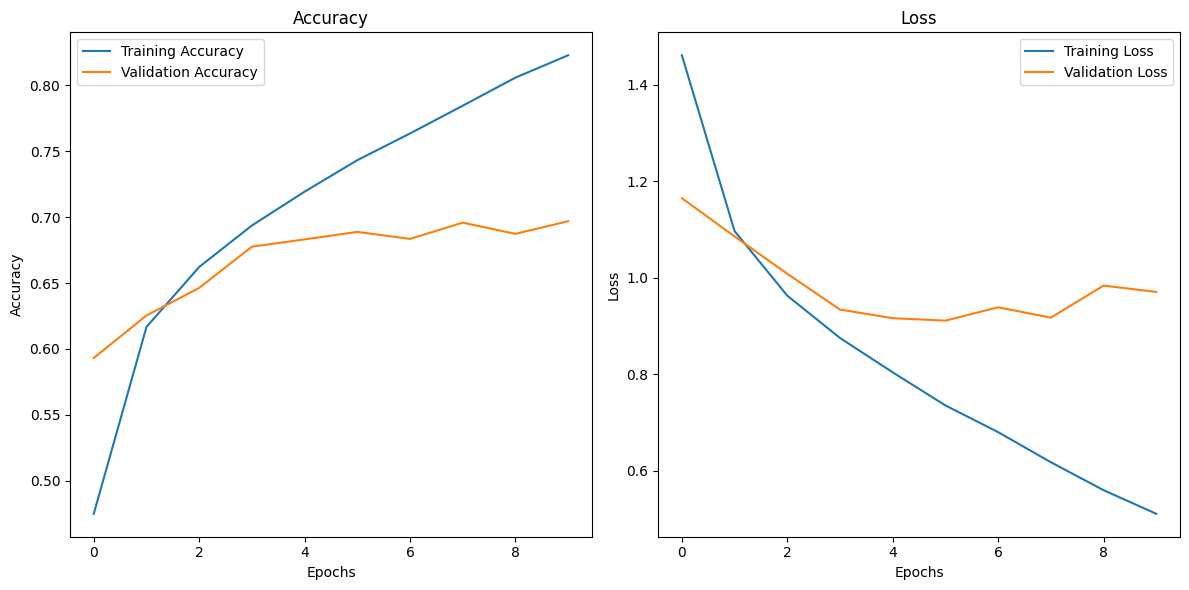

In [40]:
# 11. Write a code to plot the accuracy and loss graphs after training a CNN model
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the image data to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Plot the training and validation accuracy
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



In [43]:
# Write a code to print the architecture of the ResNet50 model in Keras

from tensorflow.keras.applications import ResNet50

# Load the VGG16 model with pre-trained weights from ImageNet
model = ResNet50(weights='imagenet')

# Print the model architecture
model.summary()


102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 22s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_9[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [44]:
# 11. Write a code to plot the accuracy and loss graphs after training a CNN model
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the image data to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\abhin\anaconda3\envs\assignment_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
